In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf

%matplotlib inline
figsize = (10, 4)

In [4]:
# Problemas no DataReader fizeram realizar a mudança para o yfinance
yf.pdr_override() # <== that's all it takes :-)

# Assim, mudar do DataReader -> get_data_yahoo
# pdr.DataReader('MALL11.SA', data_source='iex', start='2020-01-01')
# pdr.get_data_yahoo('MALL11.SA', start='2020-01-01')

# Retorno de um papel

Calculando o retorno do FII _MALL11_ que considera os valores ajustados desde 01/01/2019.

Uma primeira abordagem é a de *retorno simples*, onde:

$$
\frac{P_d-P_{d-1}}{P_{d-1}} = \frac{P_d}{P_{d-1}}-1
$$

Existe ainda o *retorno logarítmico* que é normalmente aplicado para se avaliar o comportamento de apenas um papel, onde:

$$
ln\left(\frac{P_d}{P_{d-1}}\right)
$$

In [5]:
mall11 = pdr.DataReader('MALL11.SA', start='2020-01-01')
mall11

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,125.540001,128.000000,125.510002,127.900002,127.900002,87218
2020-01-03,128.000000,132.000000,127.900002,130.500000,130.500000,53024
2020-01-06,131.399994,132.990005,130.000000,132.300003,132.300003,54766
2020-01-07,132.500000,136.500000,128.179993,131.490005,131.490005,64732
2020-01-08,131.389999,131.389999,126.000000,129.990005,129.990005,98320
...,...,...,...,...,...,...
2021-09-16,95.500000,96.400002,95.019997,95.169998,95.169998,8887
2021-09-17,95.169998,95.830002,94.620003,95.010002,95.010002,16268
2021-09-20,95.010002,95.330002,93.059998,94.379997,94.379997,15696


In [6]:
mall11['simple_return'] = (mall11['Adj Close'] / mall11['Adj Close'].shift(1))-1
mall11['log_return'] = np.log(mall11['Adj Close'] / mall11['Adj Close'].shift(1))
mall11.head(5)

,Open,High,Low,Close,Adj Close,Volume,simple_return,log_return
Date,,,,,,,,
2020-01-02,125.540001,128.000000,125.510002,127.900002,127.900002,87218,NaN,NaN
2020-01-03,128.000000,132.000000,127.900002,130.500000,130.500000,53024,0.020328,0.020125
2020-01-06,131.399994,132.990005,130.000000,132.300003,132.300003,54766,0.013793,0.013699
2020-01-07,132.500000,136.500000,128.179993,131.490005,131.490005,64732,-0.006122,-0.006141
2020-01-08,131.389999,131.389999,126.000000,129.990005,129.990005,98320,-0.011408,-0.011473


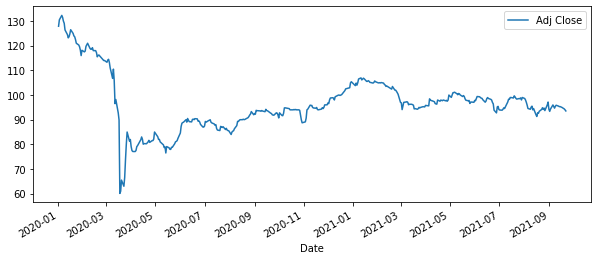

In [7]:
mall11.plot(y='Adj Close', figsize=figsize);

## Múltiplos papéis

Imagine pegar os valores ajustados de FII's logísticos desde 01/01/2019.

In [8]:
df = pd.DataFrame()
logistico = {'ALZR11', 'XPLG11', 'VILG11', 'BTLG11', 'HGLG11', 'GGRC11'}

for t in logistico:
    papel = f"{t}.SA"
    print('.', end='')
    df[papel] = pdr.DataReader(papel, start='2019-01-01')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [9]:
display(df.head(), df.tail())

,HGLG11.SA,ALZR11.SA,BTLG11.SA,XPLG11.SA,VILG11.SA,GGRC11.SA
Date,,,,,,
2019-01-02,140.899994,97.800003,74.800003,NaN,NaN,136.619995
2019-01-03,140.949997,97.989998,74.500000,NaN,NaN,135.000000
2019-01-04,140.250000,98.000000,75.000000,NaN,NaN,134.500000
2019-01-07,141.500000,98.699997,76.480003,NaN,NaN,134.699997
2019-01-08,142.000000,98.599998,77.889999,NaN,NaN,134.179993


,HGLG11.SA,ALZR11.SA,BTLG11.SA,XPLG11.SA,VILG11.SA,GGRC11.SA
Date,,,,,,
2021-09-16,162.229996,115.959999,104.000000,99.379997,107.010002,116.900002
2021-09-17,161.940002,115.989998,105.500000,100.449997,107.800003,116.000000
2021-09-20,161.250000,114.080002,105.300003,99.550003,105.500000,115.400002
2021-09-21,160.789993,115.000000,105.099998,99.330002,104.309998,115.190002
2021-09-22,162.199997,114.519997,105.010002,99.669998,105.709999,116.050003


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 673 entries, 2019-01-02 to 2021-09-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   HGLG11.SA  673 non-null    float64
 1   ALZR11.SA  672 non-null    float64
 2   BTLG11.SA  622 non-null    float64
 3   XPLG11.SA  322 non-null    float64
 4   VILG11.SA  623 non-null    float64
 5   GGRC11.SA  673 non-null    float64
dtypes: float64(6)
memory usage: 36.8 KB


In [11]:
df.describe()

,HGLG11.SA,ALZR11.SA,BTLG11.SA,XPLG11.SA,VILG11.SA,GGRC11.SA
count,673.000000,672.000000,622.000000,322.000000,623.000000,673.000000
mean,168.074354,116.678259,104.618762,118.941242,119.626388,133.072823
std,13.873201,12.875405,8.070453,8.863830,9.075409,10.258939
min,117.050003,83.510002,74.500000,98.110001,88.000000,94.000000
25%,157.309998,105.729998,101.924999,113.199997,112.770000,124.339996
50%,168.979996,118.750000,105.845001,120.230000,119.199997,134.880005
75%,177.500000,127.340002,109.887501,126.937498,125.025002,141.000000
max,221.139999,148.990005,118.529999,135.500000,151.000000,151.089996


De diferente formas podemos visualizar as contações obtidas.

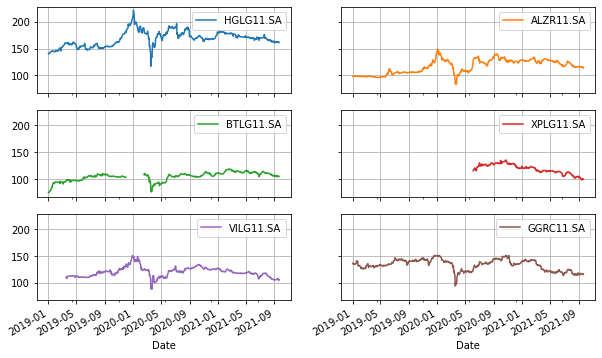

In [12]:
df.plot(subplots=True, grid=True, sharex=True, sharey=True, layout=(3, 2), figsize=(10, 6));

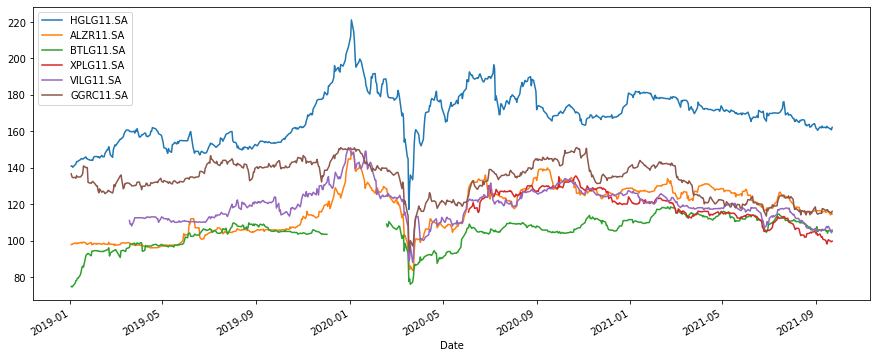

In [13]:
df.plot(legend=True, figsize=(15, 6));

... embora faça muito mais sentido vermos os dados normalizados ...

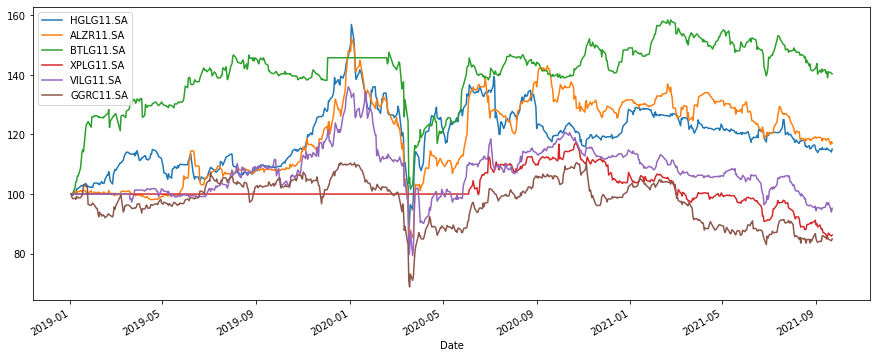

In [14]:
df.fillna(method='bfill', inplace=True)
(df / df.iloc[0]* 100).plot(figsize=(15, 6));

# Cálculo do retorno

Qual seria o retorno anualizado de cada um do fundos? (considere 250 dias úteis no ano)

In [15]:
simple_return = (df / df.shift(1))-1
log_return = np.log(df / df.shift(1))

O retorno logarítmico anualizado é dado por:

In [16]:
retorno = log_return.mean() * 252 * 100
retorno

HGLG11.SA     5.279241
ALZR11.SA     5.918432
BTLG11.SA    12.721413
XPLG11.SA    -5.563416
VILG11.SA    -1.831152
GGRC11.SA    -6.119331
dtype: float64

Sobre os mesmos dados podemos calcular a volatilidade anual de cada papel. Note que é calculado a raiz quadrada dos 252 dias por estamos trabalhando com desvio padrão. Lembrando que:
$$
\sigma = \sqrt{var}
$$

In [17]:
log_return.std() * 252 ** 0.5 * 100

HGLG11.SA    25.139856
ALZR11.SA    21.336224
BTLG11.SA    21.106104
XPLG11.SA    10.479476
VILG11.SA    25.141493
GGRC11.SA    21.634713
dtype: float64

## Variância e correlação entre os papéis

Pode ser interessante calcular a covariância e a correlação entre os papéis. 

A variância adiciona uma importante noção de risco dos papéis. Papéis de variância menor tendem a ter risco inferior quando comparadado àqueles que tem maior variância.

Considere a variância de _BTLG11_.

In [18]:
log_return['BTLG11.SA'].var()

0.00017677286292992514

Utilizando o método `cov` é possível obter a matriz de covariância tomando em consideração todos os papeis, anualizado e que considere 250 dias úteis.

O método `corr` permite considerar a relação entre os mesmos papéis. Como a ideia é mostrar qualquer correlação entre as variáveis, não é necessário anualizar o cálculo.

Observe que os estudos abaixo consideram uma análise entre os _retornos_ e não sobre os _preços_.

In [19]:
cov = log_return.cov() * 250
cov

,HGLG11.SA,ALZR11.SA,BTLG11.SA,XPLG11.SA,VILG11.SA,GGRC11.SA
HGLG11.SA,0.062700,0.021327,0.024221,0.001779,0.032861,0.025024
ALZR11.SA,0.021327,0.045162,0.013802,0.001180,0.022992,0.017710
BTLG11.SA,0.024221,0.013802,0.044193,0.001216,0.022021,0.017943
XPLG11.SA,0.001779,0.001180,0.001216,0.010895,0.002872,0.002709
VILG11.SA,0.032861,0.022992,0.022021,0.002872,0.062708,0.026034
GGRC11.SA,0.025024,0.017710,0.017943,0.002709,0.026034,0.046435


In [20]:
corr = log_return.corr()
corr

,HGLG11.SA,ALZR11.SA,BTLG11.SA,XPLG11.SA,VILG11.SA,GGRC11.SA
HGLG11.SA,1.000000,0.400784,0.460137,0.068055,0.524067,0.463777
ALZR11.SA,0.400784,1.000000,0.308937,0.053202,0.432037,0.386743
BTLG11.SA,0.460137,0.308937,1.000000,0.055402,0.418304,0.396086
XPLG11.SA,0.068055,0.053202,0.055402,1.000000,0.109880,0.120446
VILG11.SA,0.524067,0.432037,0.418304,0.109880,1.000000,0.482460
GGRC11.SA,0.463777,0.386743,0.396086,0.120446,0.482460,1.000000


## Calcular a variância de um portfólio.

Lembre-se que o _desvio padrão_ é a raiz quadrada da variância.

$$
(a+b)^2 = a^2 + 2ab + b^2
$$

Considere o peso de um papel no portfólio, é dado por $w$. Assim, para um portfólio de $n$ ações tem-se:
$$
     1 = \sum_{i=1}^{n}w_i
$$

Para calcular a variância de um portfólio de duas ações, é necessário realizar o seguinte cálculo, que considera o desvio padrão $\sigma$ de um papel e a correlação entre eles dada por $\rho$.

$$
(w_1\sigma_1+w_2\sigma_2)^2 = w_1^2\sigma_1^2 + 2w_1\sigma_1w_2\sigma_2\rho_{12} + w_2^2\sigma_2^2
$$

$^1$[Referência](https://proeducacional.com/ead/curso-cga-modulo-ii/capitulos/teoria-moderna-das-carteiras/aulas/correlacao-e-risco-de-carteira-com-2-ou-3-ativos-teoria-moderna-das-carteiras)

Em álgebra linear, considere um vetor $a$ e uma matriz $B$. É possível dizer que:

$$
(aB)^2 = a^TBa
$$

substituindo $w$ pelo vetor de peso dos papéis e $B$ pela matriz de covariância dos ativos, tem-se que:

$$
(w.Cov)^2 = \left[\begin{array}{cc} w_1 & w_2 \end{array}\right]
\left[\begin{array}{cc} v_1 & cov_{12} \\ cov_{12} & v_2\end{array} \right]
\left[\begin{array}{c} w_1 \\ w_2\end{array}\right]
$$

Desta forma pode-se calcular a variância de um determinado portfólio. Como exemplo, considere uma carteira com dois papéis (_BTLG11_ e _ALZR11_) de pesos iguais.

In [21]:
pesos = np.array([.5, .5])

A variância do portfólio $cart\_var$ pode ser calculada através do retorno anualizado dos papéis multiplicados pelo seu peso. Lembrando que o retorno anualizado pode ser dado por

```python
log_return[['BTLG11.SA', 'ALZR11.SA']].cov() * 252
```

In [22]:
cart_var = np.dot(pesos.T, np.dot(log_return[['BTLG11.SA', 'ALZR11.SA']].cov() * 252, pesos))
cart_var

0.02947364032952491

A volatilidade do portfólio, representanda pelo desvio padrão $\sigma = \sqrt{cart\_var}$.

In [23]:
risco = np.dot(pesos.T, np.dot(log_return[['BTLG11.SA', 'ALZR11.SA']].cov() * 250, pesos)) ** 0.5
f"A volatilidade é de {risco*100:0.2f}%"

'A volatilidade é de 17.10%'

## Risco

O risco de uma carteria pode ser escrito como a soma de dois componentes. A variância das ações contidas na carteira e o produto das covariâncias entre as ações e os seus desvios-padrão.

### Risco sistemático ou não diversificável

É o risco naturalmente existente e que é proveniente das mudanças diárias dos preços dos papéis. Um evento político, recessão e guerras são alguns destes riscos. Normalmente afetam ao sistema como um todo. É a variância dos papéis em uma carteira.

### Risco não sistemático ou risco diversificável (idiossincrático)

Está normalmente associado à empresas ou setores específicos. Sua mitigação normalmente decorre da diversificação investindo-se em papéis que não possuem correlação e que tendem a desaparecer.

Pode ser calculado através da variância do portfólio substraído das variâncias ponderadas anuais de cada papel. Quanto menor o risco, melhor a carteira.

In [24]:
var_0 = log_return['BTLG11.SA'].var() * 252
var_1 = log_return['ALZR11.SA'].var() * 252

In [25]:
diver_risk = cart_var - (pesos[0] ** 2 * var_0) - (pesos[1] ** 2 * var_1)

O risco diversificável pode ser dado pela variância do portfólio multiplicado pela variãncia ponderada de cada um dos papéis.

Sobre uma carteira de dois papéis, _ALZR11_ e _BTLG11_ de pesos iguais podemos dizer quer:

In [26]:
print(f"O risco diversificável é de {diver_risk*100:0.2f}%")
print(f"O risco não-diversificável é de {(cart_var-diver_risk)*100:0.2f}%")
print(f"A variância da carteira é {cart_var*100:0.2f}%")

O risco diversificável é de 0.70%
O risco não-diversificável é de 2.25%
A variância da carteira é 2.95%


Considerando todos os papéis, é esperado que o risco diversificável seja alto pela natureza equivalente dos papéis selecionados (possuem características de logísticos).

In [27]:
pesos = np.array([1/log_return.columns.size] * log_return.columns.size)

In [28]:
cart_var = np.dot(pesos.T, np.dot(log_return.cov() * 252, pesos))
f"A variância da carteira é {cart_var*100:0.2f}%"

'A variância da carteira é 2.07%'

In [29]:
non_diver_risk = 0 
for x in log_return.columns:
    non_diver_risk += log_return[x].var() * 252 * pesos[0] ** 2
f"O risco não diversificável da carteira é de {non_diver_risk*100:0.2f}%"

'O risco não diversificável da carteira é de 0.76%'

In [30]:
f"Já o risco diversificável é de {(cart_var-non_diver_risk)*100:0.2f}%"

'Já o risco diversificável é de 1.31%'

## Simulações

In [31]:
carteira = pd.DataFrame()
fii = {'ALZR11', 'BTLG11', 'GGRC11', 'HGCR11', 'HGLG11', 'HGRU11', 
       'HSML11', 'IRDM11', 'RBRP11', 'RBRR11', 'VGIP11', 
       'VILG11', 'VISC11', 'VRTA11', 'XPLG11', 'XPML11'}

for t in fii:
    papel = f"{t}.SA"
    carteira[papel] = pdr.DataReader(papel, data_source='yahoo', start='2007-01-01')['Adj Close']
    
#carteira.fillna(method='bfill', inplace=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [32]:
log_return = np.log(carteira / carteira.shift(1))
pesos = np.array([1/carteira.columns.size] * carteira.columns.size)

In [33]:
carteira_var = np.dot(pesos.T, np.dot(log_return.cov() * 252, pesos))
f"A variância da carteira é de {(carteira_var)*100:0.2f}%"

'A variância da carteira é de 1.86%'

In [34]:
non_diver_risk = 0
p = pesos[0] ** 2
for x in log_return.columns:
    non_diver_risk += log_return[x].var() * 252 * p
f"O risco não diversificável da carteira é de {non_diver_risk*100:0.2f}%"

'O risco não diversificável da carteira é de 0.32%'

In [35]:
f"Já o risco diversificável é de {(carteira_var-non_diver_risk)*100:0.2f}%"

'Já o risco diversificável é de 1.54%'